# Data Visualization

**Write and execute R code in the code cells per the instructions.  The expected results are provided for you directly following the code cells.**

In [36]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

## Data

In [3]:
data = data.frame(name=c("A","B","C","D","E","F"),
                  x1=c(2.5, 2, 9, 6.5, 8, 4),
                  x2=c(7, 3.5, 1, 7, 2.5, 8.5),
                  x3=c(9, 10, 1, 2, 1.5, 9))
data

name,x1,x2,x3
<chr>,<dbl>,<dbl>,<dbl>
A,2.5,7.0,9.0
B,2.0,3.5,10.0
C,9.0,1.0,1.0
D,6.5,7.0,2.0
E,8.0,2.5,1.5
F,4.0,8.5,9.0


## Problem 1

Show scatterplots of x1 vs. x2, x1 vs. x3, and x2 vs. x3, presented side-by-side.  Label each point by its name.  Distinguish each scatterplot by point color.  Title each scatterplot with the correlation between the variables shown in that scatterplot.  Scale each scatterplot horizontally 0 to 11 and vertically 0 to 11.

You may want to use these function(s):
* out(7,3)
* ggplot()
* ggtitle()
* sprintf()
* cor()
* xlim()
* ylim()
* geom_point()
* geom_text()
* grid.arrange()

Use `PALETTE[1]` for color blue, `PALETTE[2]` for color red, and `PALETTE[3]` for color green.

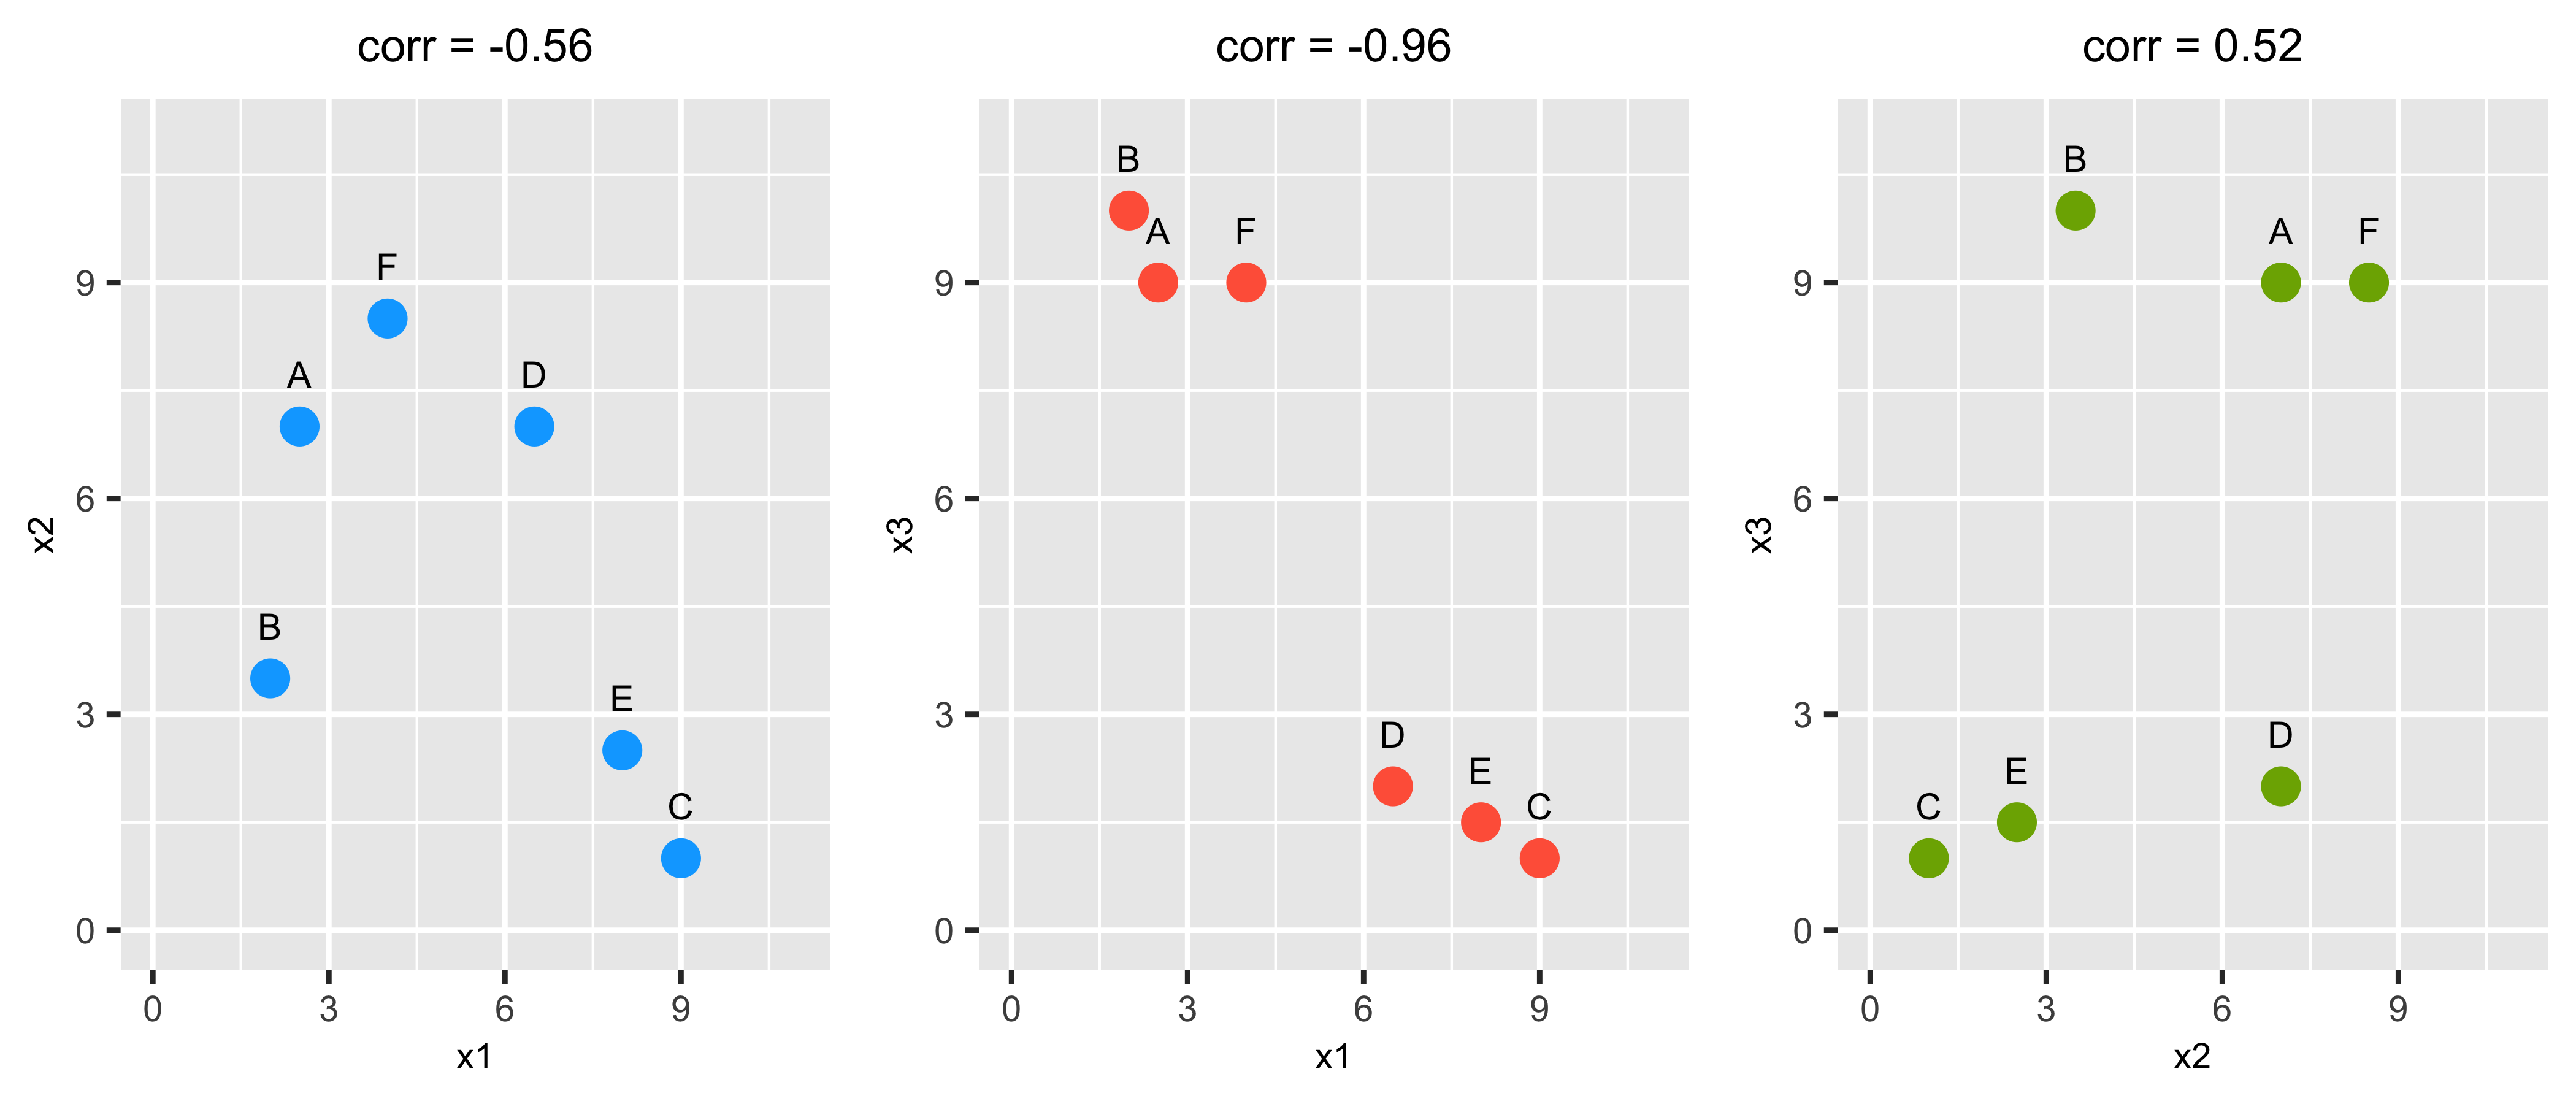

In [4]:
corr1 = round(cor(data$x1, data$x2), digits = 2)
s1 = ggplot(data) + xlim(0, 11) + ylim(0, 11) + ggtitle(sprintf("corr = %s", corr1)) + 
geom_point(aes(x=x1, y=x2,), color=PALETTE[1]) +
geom_text(aes(x=x1, y=x2, label=name), vjust=-1.5)

corr2 = round(cor(data$x1, data$x3), digits = 2)
s2 = ggplot(data) + xlim(0, 11) + ylim(0, 11) + ggtitle(sprintf("corr = %s", corr2)) + 
geom_point(aes(x=x1, y=x3), color=PALETTE[2]) +
geom_text(aes(x=x1, y=x3, label=name), vjust=-1.5)

corr3 = round(cor(data$x2, data$x3), digits = 2)
s3 = ggplot(data) + xlim(0, 11) + ylim(0, 11) + ggtitle(sprintf("corr = %s",  corr3)) + 
geom_point(aes(x=x2, y=x3), color=PALETTE[3]) +
geom_text(aes(x=x2, y=x3, label=name), vjust=-1.5)

grid.arrange(s1, s2, s3, nrow=1)


## Problem 2

Show scatterplots of x1 vs. x2, x1 vs. x3, and x2 vs. x3, leveraging the `ggscatmat` function.

You may want to use these function(s):
* out(4,4)
* ggscatmat()

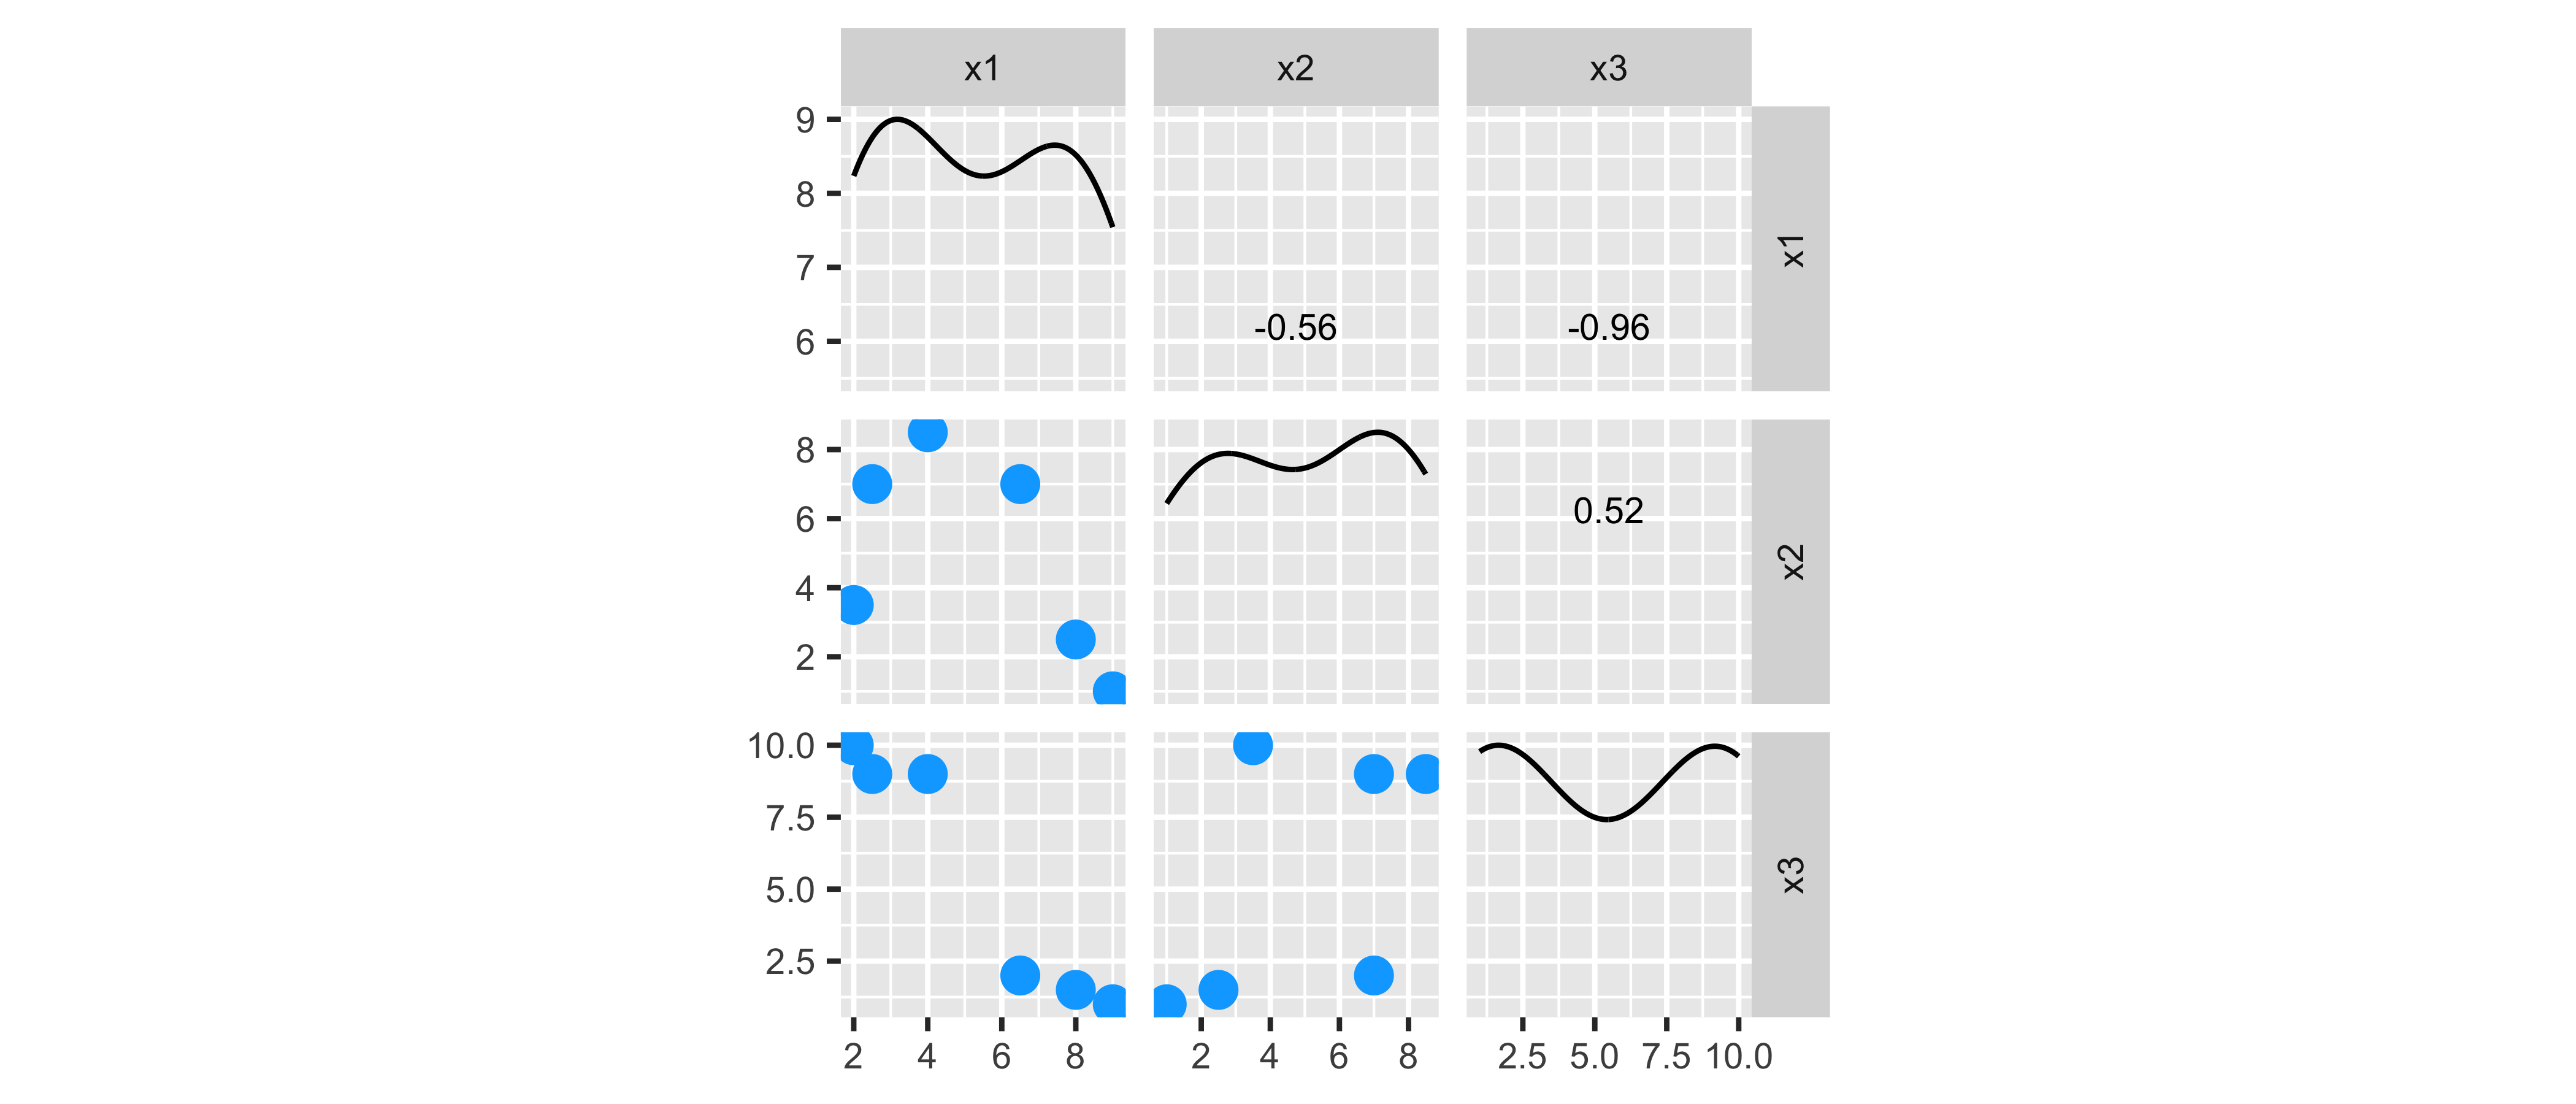

In [5]:
ggscatmat(data)
out(4,4)


## Problem 3

Show a lineplot of the numeric data, with x1 as the shared sequence control.  Show points on the lineplot corresponding to the observations.  Distinguish x2 vs. x3 by color.  Title as "Line".  Show a horizontal axis label, but not vertical axis label.  Include a legend. 

Show a pathplot of the numeric data.  Show points on the pathplot corresponding to the observations.  Distinguish x2 vs. x3 by color.  Title as "Path".  Show a horizontal axis label, but not vertical axis label.  Include a legend. 

Present the lineplot and pathplot side-by-side.

You may want to use these function(s):
* out(7,3)
* ggplot()
* ggtitle()
* ylab()
* geom_point()
* geom_line()
* geom_path
* scale_color_manual()
* grid.arrange()

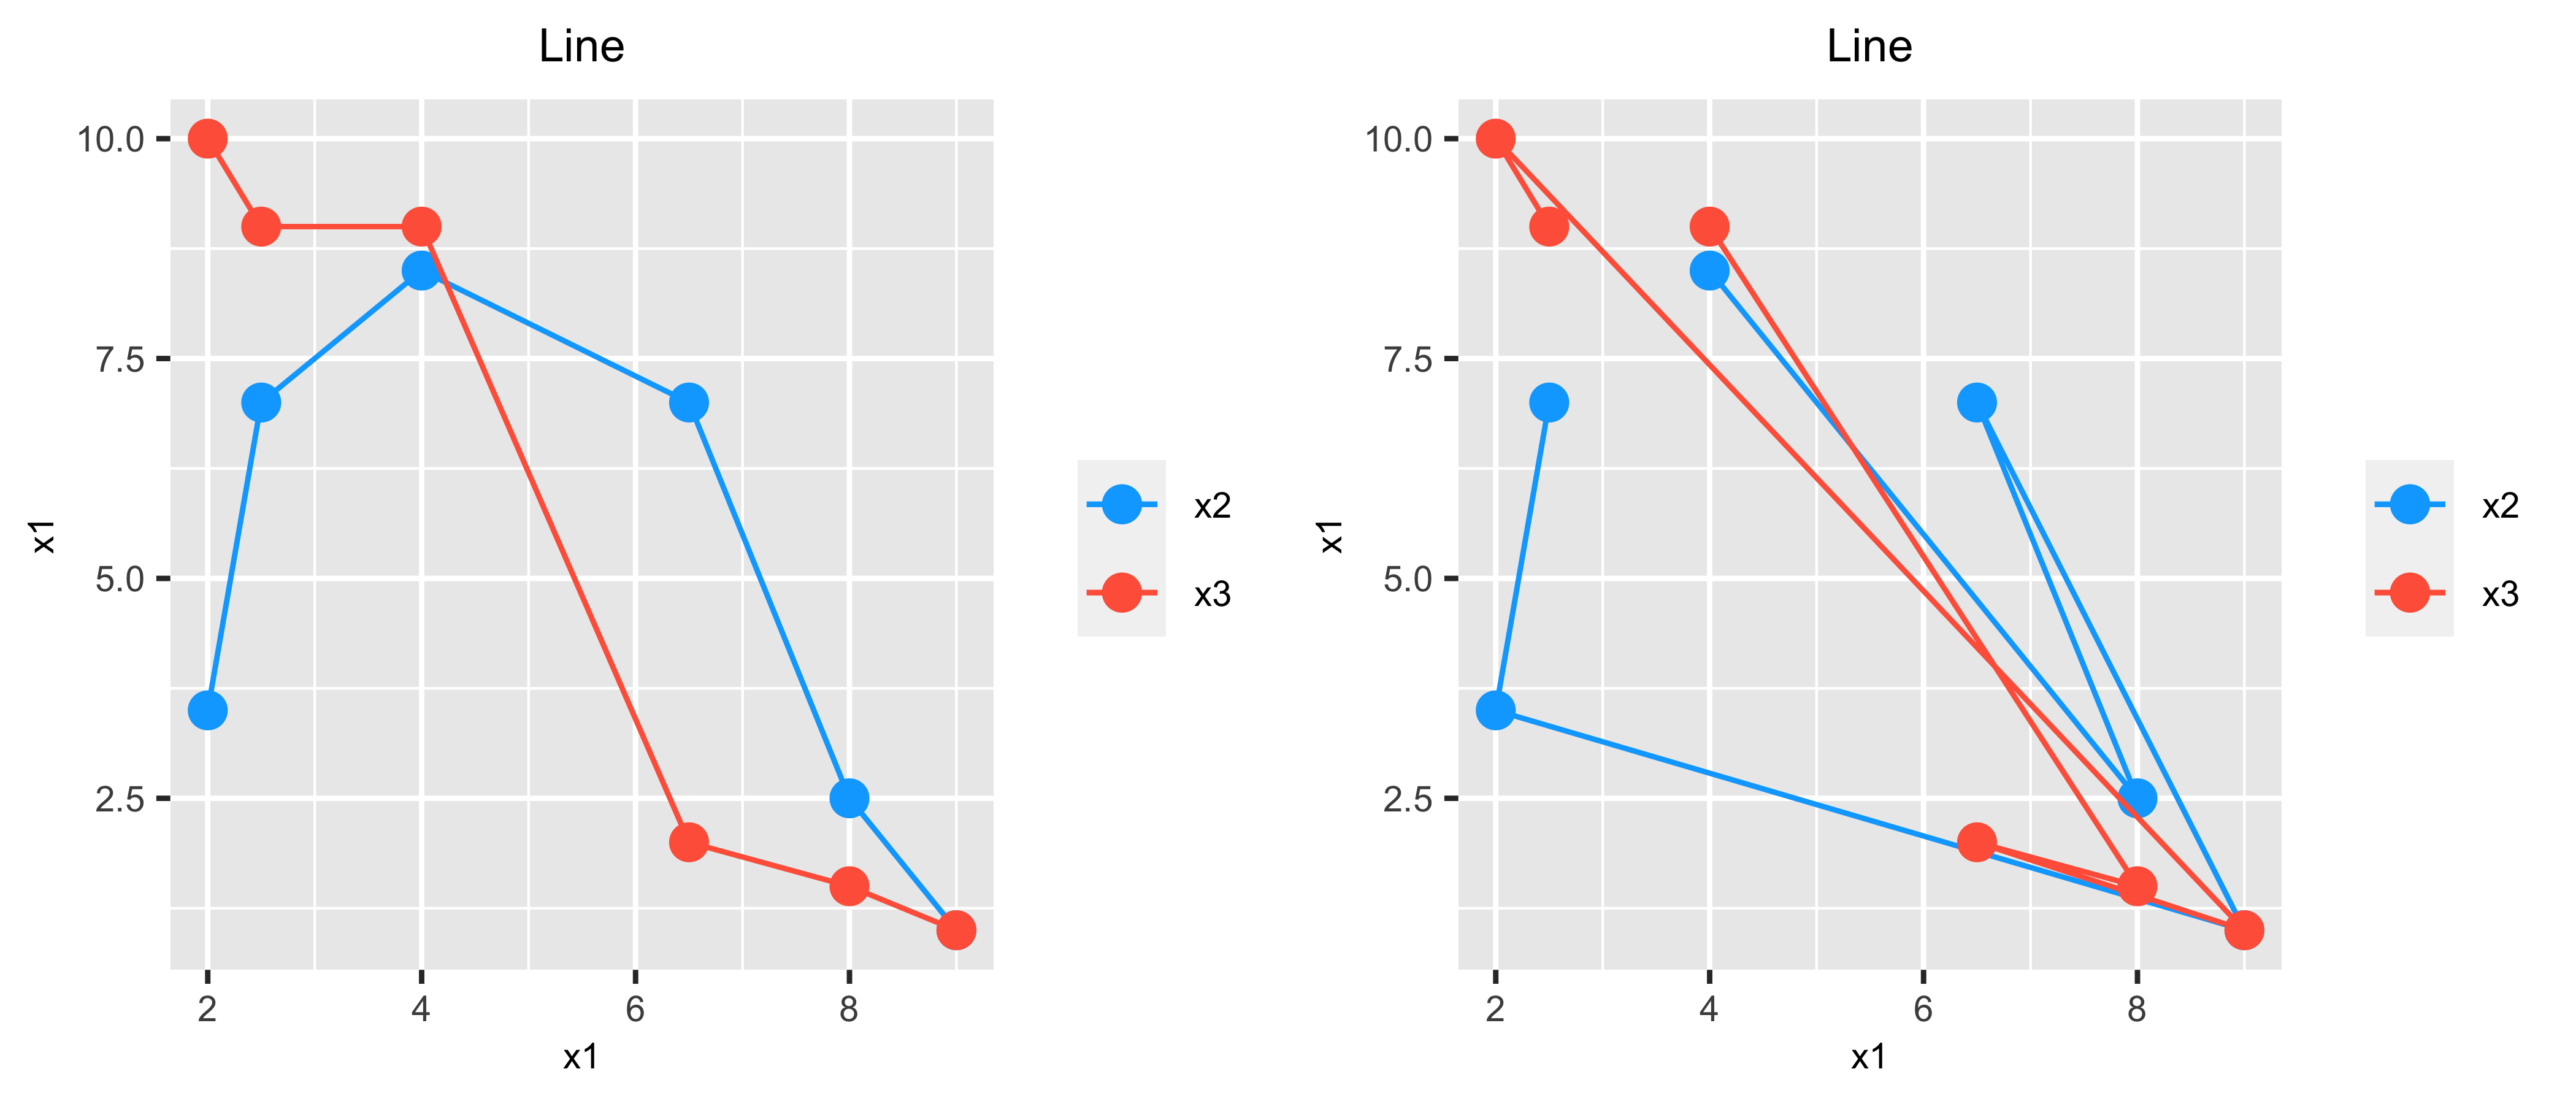

In [6]:
out(7,3)

l1 = ggplot(data) + ggtitle("Line") + ylab("x1") +
geom_line(aes(x=x1, y=x2, color="x2")) +
geom_point(aes(x=x1, y=x2, color="x2")) +
geom_line(aes(x=x1, y=x3, color="x3")) +
geom_point(aes(x=x1, y=x3, color="x3")) +
scale_color_manual(values=PALETTE[1:2])

l2 = ggplot(data) + ggtitle("Line") + ylab("x1") +
geom_path(aes(x=x1, y=x2, color="x2")) +
geom_point(aes(x=x1, y=x2, color="x2")) +
geom_path(aes(x=x1, y=x3, color="x3")) +
geom_point(aes(x=x1, y=x3, color="x3")) +
scale_color_manual(values=PALETTE[1:2])

grid.arrange(l1, l2, nrow=1)


## Problem 4

Show a set of histograms, one for each numeric variable.  Use 6 bins.  Use lower boundary 0.  Scale horizontally 0 to 10 and vertically 0 to 3.  Distiguish x1 vs. x2 vs. x3 by color.

Present the histograms side-by-side.

You may want to use these function(s):
* out(7,2.5)
* ggplot()
* xlim()
* ylim()
* geom_histogram()
* grid.arrange() 

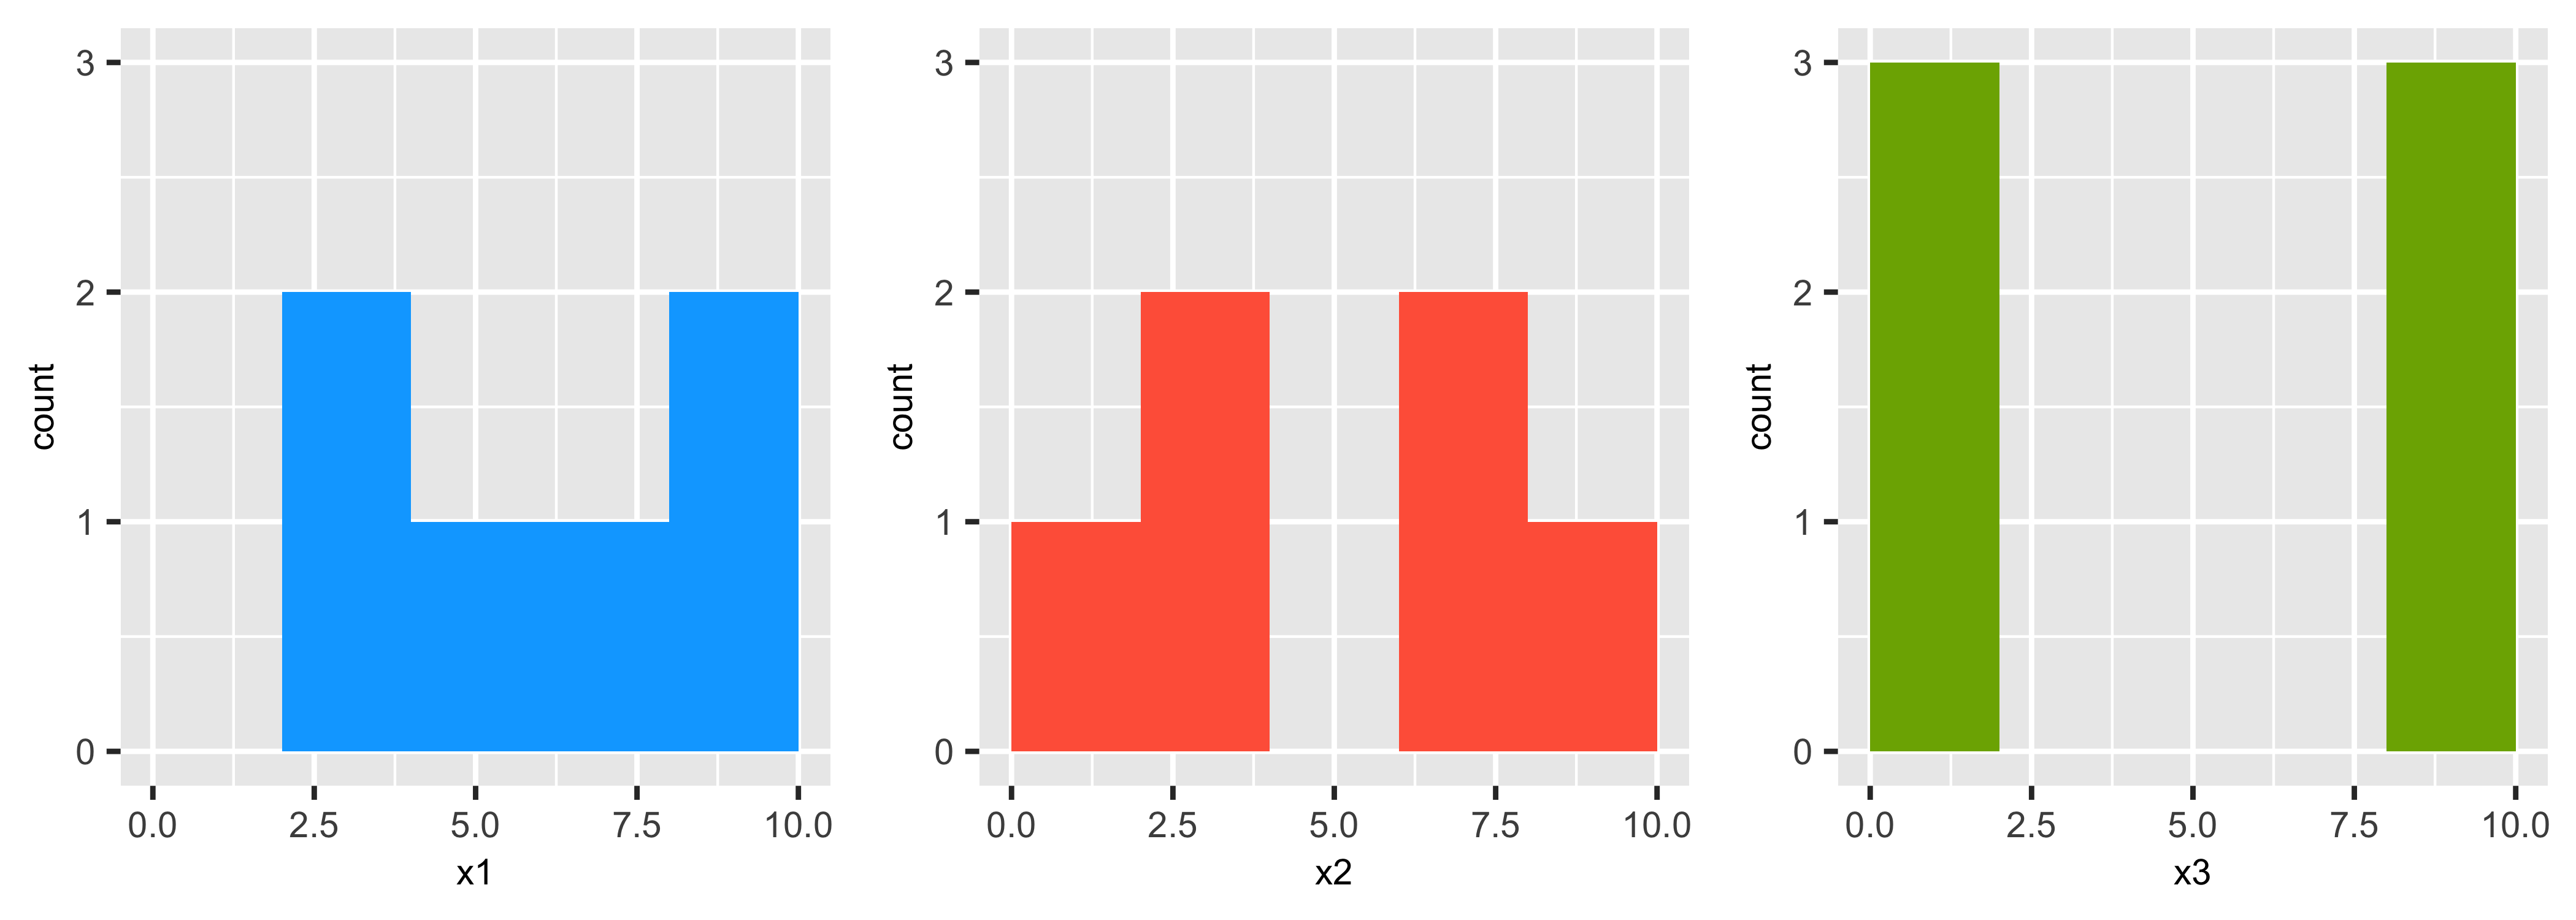

In [7]:
out(7,2.5)

h1 = ggplot(data) + xlim(0, 10) + ylim(0,3) +
geom_histogram(aes(x=x1), boundary=0, closed="left",bins=6, fill=PALETTE[1])

h2 = ggplot(data) + xlim(0, 10) + ylim(0,3) +
geom_histogram(aes(x=x2, y=stat(count)), boundary=0, bins=6, fill=PALETTE[2])

h3 = ggplot(data) + xlim(0, 10) + ylim(0,3) +
geom_histogram(aes(x=x3, y=stat(count)), boundary=0, bins=6, fill=PALETTE[3])

grid.arrange(h1, h2, h3, nrow=1)

## Problem 5

Show a scatterplot projection of x1 vs. x2 vs. x3.  Scale each axis 0 to 11.

You may want to use these function(s):
* open3d()
* view3d()
* plot3d()
* grid3d()
* rglwidget()

In [38]:
open3d(silent=TRUE)
view3d(theta=-20, phi=-3, fov=30, zoom=0.85)
plot3d(data, type="s", radius=0.3, col=PALETTE[1], xlim=c(0,6), ylim=c(0,6), zlim=c(0,6))
grid3d(c("x","y","z"))
rglwidget()

HTML widgets cannot be represented in plain text (need html)